In [ ]:
#!pip install -I rpy2==3.4.2

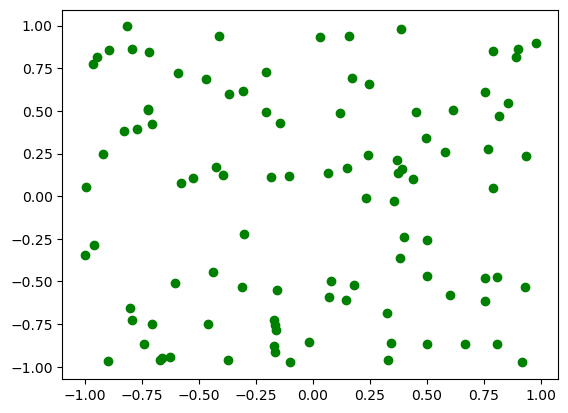

In [41]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# %%
# import packages, set path and create tf session

import numpy as np
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
import tensorflow.keras
import matplotlib.pyplot as plt
import tensorflow
import rpy2.robjects as robjects

project_path = ""



# %%
# set parameters and create data

np.random.seed(seed=1)  # set seed 3+2

d = 1  # output dimension
n_samples = 100  # number of samples



# training data
x_min = -1
x_max = 1
#x_train = np.array(np.linspace(x_min, x_max, n_samples)).reshape(n_samples, d)
x_train = np.random.uniform(-1,1,n_samples).reshape(n_samples, d)
x_train = np.sort(x_train, 0)

# xrange for plots
resolution = 1920
x_smooth = np.array(np.linspace(x_min, x_max, resolution)).reshape(resolution, 1)

y_min = -500.6
y_max = 500.6

# training output #HERE YOU CAN CHANGE THE y-DATA BY REPLACING np.sin
y_train = (np.random.uniform(-1,1,
                            size=n_samples)+0)

# validation data
x_val = ((np.random.rand(2, d)-0.5)*2.0).reshape(2, d)
y_val = 0*np.sin(np.pi*x_val[:, 0])

# plot training (and validation data)
plt.plot(x_train, y_train,'go')
#plt.plot(x_val, y_val,'k.')


 

60/60 [==============================] - 0s 1ms/step


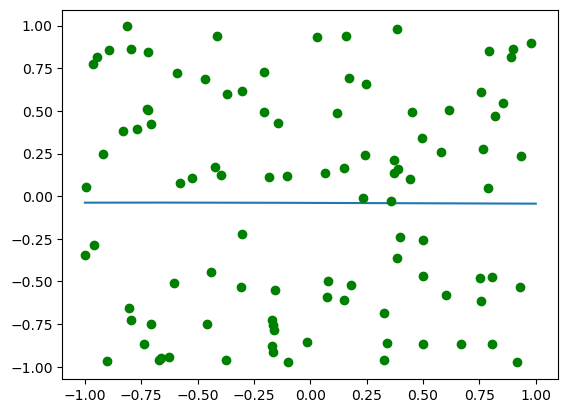

In [43]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# %%
# import packages, set path and create tf session

import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform
from keras import regularizers
from keras import optimizers
import keras
import matplotlib.pyplot as plt
import tensorflow
import rpy2.robjects as robjects

project_path = ""

#sess = tensorflow.InteractiveSession()
#sess.run(tensorflow.global_variables_initializer())


# %%
# define functions

def createModelTrainBothLayers(n=100, s=0.05, l2reg=0, seed=None):
    # creates an classical Shallow with n hidden nodes Ridge regularization on all parameters is controlled by l2reg.

    model = Sequential()
    model.add(Dense(n,
                    activation='relu',
                    input_dim=d,
                    trainable=True,
                    kernel_initializer=RandomUniform(minval=-s,
                                                     maxval=s,
                                                     seed=seed),
                    bias_initializer=RandomUniform(minval=-s,
                                                   maxval=s,
                                                   seed=seed),
                    kernel_regularizer=regularizers.l2(l2reg),
                    bias_regularizer=regularizers.l2(l2reg),
                    name="myHiddenLayer"))
    model.add(Dense(1,
                    activation='linear',
                    kernel_initializer=RandomUniform(minval=-s,
                                                     maxval=s,
                                                     seed=seed),
                    bias_initializer=RandomUniform(minval=-s,
                                                   maxval=s,
                                                   seed=seed),
                    kernel_regularizer=regularizers.l2(l2reg),
                    bias_regularizer=regularizers.l2(l2reg),
                    name="myOutputLayer"))
 
    return model



# %%
# set parameters and create data

#np.random.seed(seed=3+2)  # set seed

d = 1  # output dimension
#n_samples = 16  # number of samples

# RSN parameter
s = 0.05  # range of random initialization
n = 100  # number of hidden nodes

# training parameter
epoch_nr = 10000  # number of epochs
#lr = 2**(-4)  # learning rate
#tr_time = epoch_nr*lr  # training time  (tr_time*n_samples = T_paper)
weight_name = 'trainBothLayer'+str(epoch_nr)+'.h5'


# # training data
# x_min = -1
# x_max = 1
# x_train = np.array(np.linspace(x_min, x_max, n_samples)).reshape(n_samples, d)
# x_train = np.sort(x_train, 0)

# # xrange for plots
# resolution = 1920
# x_smooth = np.array(np.linspace(x_min, x_max, resolution)).reshape(resolution, 1)

# y_min = -500.6
# y_max = 500.6

# # training output #HERE YOU CAN CHANGE THE y-DATA BY REPLACING np.sin
# y_train = (np.random.normal(scale=0,
#                             size=n_samples)+0.5)

# # validation data
# x_val = ((np.random.rand(256, d)-0.5)*2.0).reshape(256, d)
# y_val = np.sin(np.pi*x_val[:, 0])

# plot training (and validation data)
#plt.plot(x_train, y_train,'go')
#plt.plot(x_val, y_val,'k.')


# %%
# set up RSN and compile

model = createModelTrainBothLayers(n=n,l2reg=0)

model.compile(optimizer="adam",#optimizers.Adam(lr=lr),
              loss='MSE',
              metrics=['MSE'])

# (plot untrained network)
plt.plot(x_smooth,model.predict(x_smooth))
plt.plot(x_train, y_train, 'go')







In [24]:
#model.load_weights('NNBothTrained'+weight_name)

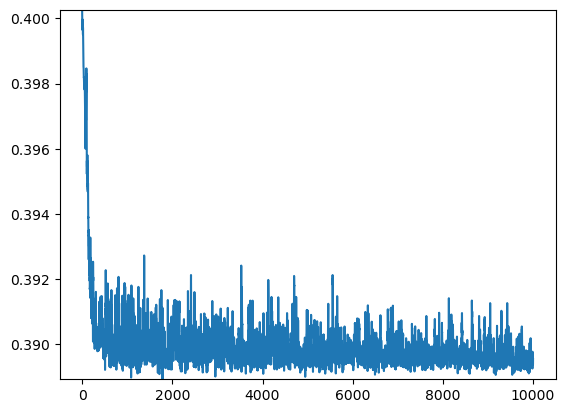

60/60 [==============================] - 0s 1ms/step


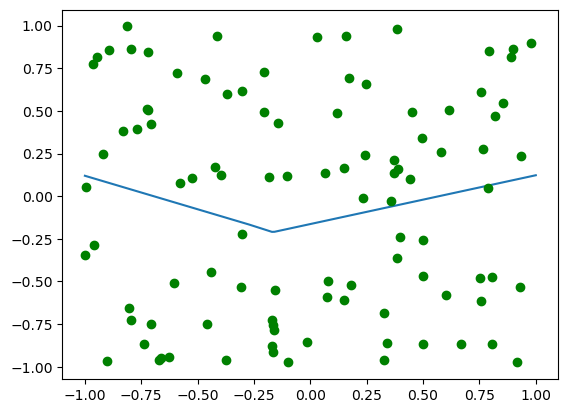

In [44]:
# train NN 
history = model.fit(x_train,
                    y_train,
                    #batch_size=min(n_samples, 512),
                    epochs=epoch_nr,
                    verbose=0,
                    validation_data=(x_train, y_train),
                    shuffle=True)
# save weights in cwd
model.save_weights('NNBothTrained'+weight_name)
#w = model.get_weights() #can improof speed

# (visualize training & validation loss)
plt.plot(history.history['loss'])
#plt.ylim(bottom=0.0002900070,top=0.0002900130)
#plt.ylim(bottom=np.min(history.history['loss'],axis=None),top=0.0002900045)
plt.ylim(bottom=np.min(history.history['loss'],axis=None),top=np.max(history.history['loss'],axis=None))
#plt.plot(history.history['val_loss'])
plt.show()
plt.plot(x_smooth,model.predict(x_smooth))
plt.plot(x_train, y_train, 'go')

60/60 [==============================] - 0s 1ms/step


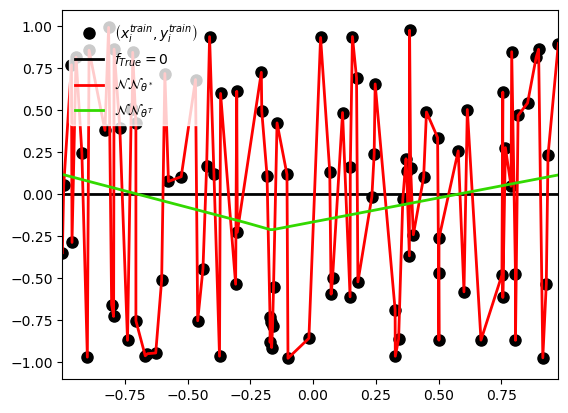

In [60]:
radPlot=1
xPlot=np.linspace(-radPlot,radPlot,1920)
#y_lin=linmodel.predict(xPlot.reshape(-1, 1))
#ySpline = splinePredict(spline, xPlot)
#y_neigh=neigh.predict(xPlot.reshape(-1, 1))
#y_poly=polymodel.predict(xPlot.reshape(-1, 1))
y_NN=model.predict(xPlot.reshape(-1, 1))
yminPlot=-1.1 #+0*( min(np.min(model.predict(xPlot)),np.min(modelRidge.predict(xPlot)))-0.05 )
ymaxPlot=1.1 #+ 0*( max(np.max(model.predict(xPlot)),np.max(modelRidge.predict(xPlot)))+0.05 )
#choosePlot='NN'

#for choosePlot in ['none','RSN', 'RSNridge', 'lin','poly','near','spline','NN','all']:

#plt.plot(x_train,y_train,'k--',linewidth=1/8)
plt.plot(x_train,y_train,'ko',markersize=8,label=r'$\left(x_i^{train},y_i^{train} \right)$')  
plt.plot(xPlot,0*xPlot,'-', color="k", linewidth=2,label=r'$f_{{True}}=0$') 
plt.plot(x_train,y_train,'-', color="red", linewidth=2,label=r'$\mathcal{NN}_{\theta^*}$')

#if choosePlot=='NN' or choosePlot=='all':
plt.plot(xPlot,y_NN,'-', color=(0.2, 0.85, 0.0), linewidth=2,label=r'$\mathcal{NN}_{\theta^T}$') 
#else:
#    plt.plot(xPlot,y_NN,'-', color=(1.0, 0.5, 0.75), linewidth=2,label=r'   ', alpha=0.0) 

plt.ylim(yminPlot,ymaxPlot)
plt.xlim(min(x_train),max(x_train))

legend=plt.legend(loc='upper left', frameon=True, framealpha=0.8, edgecolor='1.0')  #, bbox_to_anchor=(0.79, 0.8))
#plt.setp(legend.get_texts(), alpha=0.0)
plt.savefig('TrainingBothLayers_'+choosePlot+'.svg', format='svg',transparent=True)
plt.savefig('TrainingBothLayers_'+choosePlot+'.pdf', format='pdf',transparent=True)
plt.show()

60/60 [==============================] - 0s 1ms/step


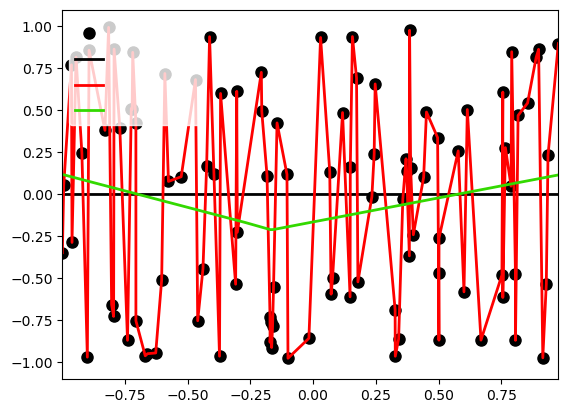

In [56]:
radPlot=1
xPlot=np.linspace(-radPlot,radPlot,1920)
#y_lin=linmodel.predict(xPlot.reshape(-1, 1))
#ySpline = splinePredict(spline, xPlot)
#y_neigh=neigh.predict(xPlot.reshape(-1, 1))
#y_poly=polymodel.predict(xPlot.reshape(-1, 1))
y_NN=model.predict(xPlot.reshape(-1, 1))
yminPlot=-1.1 #+0*( min(np.min(model.predict(xPlot)),np.min(modelRidge.predict(xPlot)))-0.05 )
ymaxPlot=1.1 #+ 0*( max(np.max(model.predict(xPlot)),np.max(modelRidge.predict(xPlot)))+0.05 )
#choosePlot='NN'

#for choosePlot in ['none','RSN', 'RSNridge', 'lin','poly','near','spline','NN','all']:

#plt.plot(x_train,y_train,'k--',linewidth=1/8)
plt.plot(x_train,y_train,'ko',markersize=8,label=r'$\left(x_i^{train},y_i^{train} \right)$')  # $\left(x_i,y_i \right)$')
plt.plot(xPlot,0*xPlot,'-', color="k", linewidth=2,label=r'$f_{{True}}=0$') 
plt.plot(x_train,y_train,'-', color="red", linewidth=2,label=r'$\mathcal{NN}_{\theta^*}$')

#if choosePlot=='NN' or choosePlot=='all':
plt.plot(xPlot,y_NN,'-', color=(0.2, 0.85, 0.0), linewidth=2,label=r'$\mathcal{NN}_{\theta^T}$') 
#else:
#    plt.plot(xPlot,y_NN,'-', color=(1.0, 0.5, 0.75), linewidth=2,label=r'   ', alpha=0.0) 

plt.ylim(yminPlot,ymaxPlot)
plt.xlim(min(x_train),max(x_train))

legend=plt.legend(loc='upper left', frameon=True, framealpha=0.8, edgecolor='1.0')  #, bbox_to_anchor=(0.79, 0.8))
plt.setp(legend.get_texts(), alpha=0.0)
plt.savefig('TrainingBothLayers_'+choosePlot+'NoLabel.svg', format='svg',transparent=True)
plt.savefig('TrainingBothLayers_'+choosePlot+'NoLabel.pdf', format='pdf',transparent=True)
plt.show()